DataSet Name:- WineQuality-white.csv

DataSet Description Link:- https://archive.ics.uci.edu/ml/datasets/Wine+Quality

DataSet Download Link:- https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

DataSet Description:- 

Attribute Description:-
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

Aim:- Implement the techniques to deal with outliers.

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics

# read winequality.csv file
df = pd.read_csv('winequality.csv')

print(df.shape)
df.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 11: invalid start byte

In [2]:
#Check if any null value is there in dataset
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

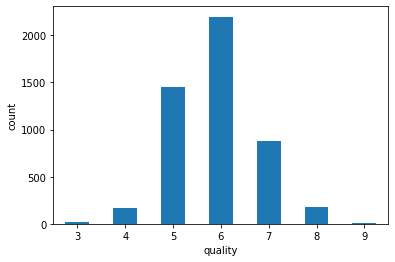

In [5]:
df['quality'].value_counts().sort_index().plot(kind='bar',rot=0)
plt.xlabel('quality')
plt.ylabel('count')
plt.show()

In [6]:
#descriptive statics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


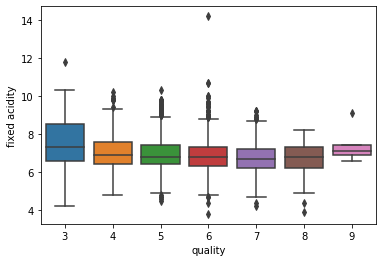

In [7]:
sns.boxplot(df['quality'],df['fixed acidity'])

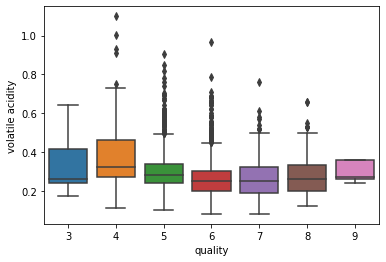

In [8]:
sns.boxplot(df['quality'],df['volatile acidity'])

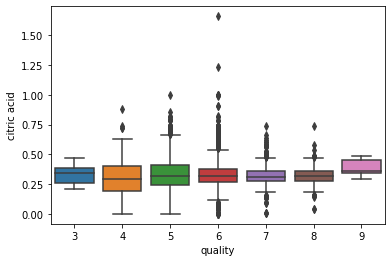

In [9]:
sns.boxplot(df['quality'],df['citric acid'])

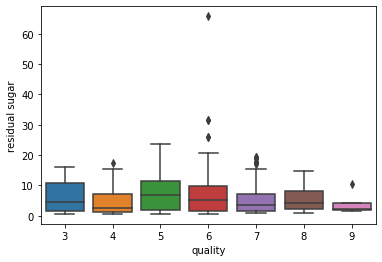

In [10]:
sns.boxplot(df['quality'],df['residual sugar'])

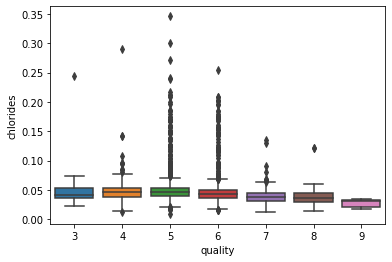

In [11]:
sns.boxplot(df['quality'],df['chlorides'])


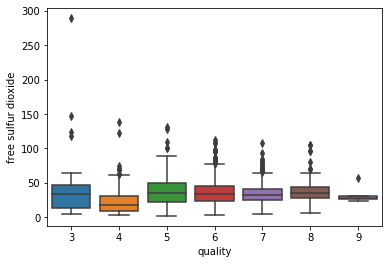

In [23]:
sns.boxplot(df['quality'],df['free sulfur dioxide'])

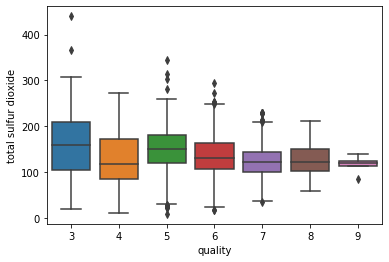

In [13]:
sns.boxplot(df['quality'],df['total sulfur dioxide'])


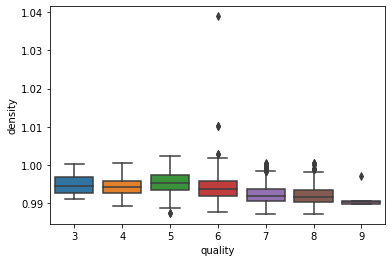

In [14]:
sns.boxplot(df['quality'],df['density'])


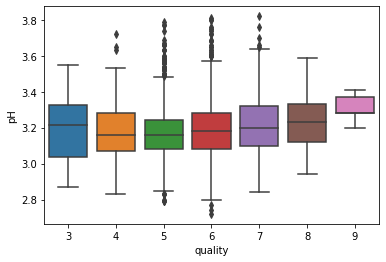

In [15]:
sns.boxplot(df['quality'],df['pH'])


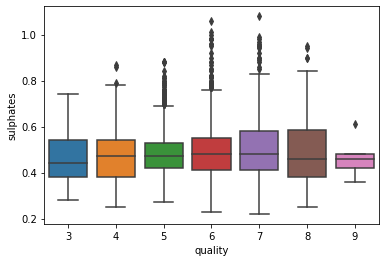

In [16]:
sns.boxplot(df['quality'],df['sulphates'])


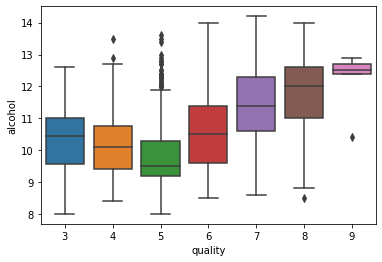

In [17]:
sns.boxplot(df['quality'],df['alcohol'])

In [21]:
print("fixed acidity: "+str(df['fixed acidity'].quantile(.999))+"\nvolatile acidity: "
+str(df['volatile acidity'].quantile(.999))+"\ncitric acid: "
+str(df['citric acid'].quantile(.999))+"\nresidual sugar: "
+str(df['residual sugar'].quantile(.9999))+"\nchlorides: "
+str(df['chlorides'].quantile(.9999))+"\nfree sulfur dioxode: "
+str(df['free sulfur dioxide'].quantile(.999))+"\ntotal sulfur dioxide: "
+str(df['total sulfur dioxide'].quantile(.999))+"\ndensity: "
+str(df['density'].quantile(.9999))+"\nph: "
+str(df['pH'].quantile(.9999))+"\nsulphets: "
+str(df['sulphates'].quantile(.999))+"\nalcohol: "
+str(df['alcohol'].quantile(.999)))

fixed acidity: 10.3
volatile acidity: 0.905515000000005
citric acid: 1.0
residual sugar: 49.05225999999711
chlorides: 0.3239634999999962
free sulfur dioxode: 124.4120000000039
total sulfur dioxide: 303.4635000000044
density: 1.0249354039999976
ph: 3.8151029999999992
sulphets: 0.9810300000000097
alcohol: 14.0


In [24]:
arrQua = np.array(df['quality'])
arrFA = np.array(df['fixed acidity'])
arrVA = np.array(df['volatile acidity'])
arrCA = np.array(df['citric acid'])
arrRS = np.array(df['residual sugar'])
arrCh = np.array(df['chlorides'])
arrFSD = np.array(df['free sulfur dioxide'])
arrTSD = np.array(df['total sulfur dioxide'])
arrDen = np.array(df['density'])
arrpH = np.array(df['pH'])
arrSul = np.array(df['sulphates'])
arrAlco = np.array(df['alcohol'])

fa = arrQua[df['fixed acidity'] >= 10.3]
va = arrQua[df['volatile acidity'] >= 0.9055]
ca = arrQua[df['citric acid'] >= 1.0]
rs = arrQua[df['residual sugar'] >= 49.05225]
ch = arrQua[df['chlorides'] >= 0.323969]
fsd = arrQua[df['free sulfur dioxide'] >= 124.412]
tsd9 = arrQua[df['total sulfur dioxide'] >= 303.4635]
tsd1 = arrQua[df['total sulfur dioxide'] <= 20.794]
den = arrQua[df['density'] >= 1.02493]
ph = arrQua[df['pH'] >= 3.81510]
sul = arrQua[df['sulphates'] >= 0.98103]
al = arrQua[df['alcohol'] >= 14.0]

print(fa)
print(va)
print(ca)
print(rs)
print(ch)
print(fsd)
print(tsd9)
print(tsd1)
print(den)
print(ph)
print(sul)
print(al)

[6 6 6 3]
[4 4 4 6 4]
[6 6]
[6]
[5]
[5 3 5 4 3]
[5 3 3 5 3]
[6]
[7]
[6 6 7 6 7]
[7 7]


In [51]:
outliers = df[
    (df['fixed acidity'] >= 10.3) |
    (df['volatile acidity'] >= 0.90552) |
    (df['citric acid'] >= 1 )|
    (df['residual sugar'] >= 49.05)|
    (df['chlorides'] >= 0.245 )|
    (df['free sulfur dioxide'] >= 124.412 )|
    (df['total sulfur dioxide'] >= 303.46 )|
    (df['total sulfur dioxide'] <= 20.794 )|
    (df['density'] >= 1.024935)|
    (df['pH'] >= 3.81510 )|
    (df['sulphates'] >= 0.98103 ) |
    (df['alcohol'] >= 14 ) |
    (df['alcohol'] <= 8.48 ) 
]
print("outliers\n")
print(outliers['quality'].value_counts().sort_index())
print("data set \n")
print(df['quality'].value_counts().sort_index())

outliers

3     7
4     8
5    12
6    17
7     8
8     1
Name: quality, dtype: int64
data set 

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64


In [48]:
print("not Outliers:\n")
notOutlier = outliers[outliers['quality'] <= 4]
print(notOutlier)

not Outliers:

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
687             6.8             0.670         0.30           13.00      0.290   
740             6.9             0.390         0.40            4.60      0.022   
873            10.3             0.170         0.47            1.40      0.037   
1417            8.6             0.550         0.35           15.55      0.057   
1856           10.0             0.910         0.42            1.60      0.056   
1931            7.1             0.490         0.22            2.00      0.047   
1951            9.9             1.005         0.46            1.40      0.046   
2050           11.8             0.230         0.38           11.10      0.034   
2154            9.8             0.930         0.45            8.60      0.052   
3050            6.2             0.255         0.24            1.70      0.039   
3901            4.8             0.650         0.12            1.10      0.013   
4039         